# 1- Importation et préparation des données

In [37]:
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import date
import statistics as st
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.distributions.empirical_distribution import ECDF
from TimeSerie_fct import create_monthly_avg_time_serie
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import os



data_temperature = pd.read_table('../data/observatoire-geneve/TG_STAID000241.txt',sep = ',',
                                names = ['SOUID','DATE','TG','Q_TG'], skiprows = range(0,20))

data_temperature.drop(data_temperature[ data_temperature['Q_TG'] == 9 ].index, inplace = True)
data_temperature['Year'] = [int(str(d)[:4]) for d in data_temperature.DATE]
data_temperature['Month'] = [int(str(d)[4:6]) for d in data_temperature.DATE]
data_temperature['Day'] = [int(str(d)[6:8]) for d in data_temperature.DATE]

#Compute the day of the year for each year
day_of_year = np.array(len(data_temperature['Day']))

adate = [datetime.strptime(str(date),"%Y%m%d") for date in data_temperature.DATE]
data_temperature['Day_of_year'] = [d.timetuple().tm_yday for d in adate]
data_temperature.TG = data_temperature.TG/10.

#data_temperature["Week_of_year"] = 
#s = datetime.date(2010, 6, 16).isocalendar()

In [38]:
df = data_temperature

In [36]:
Years = np.array(df.Year.unique())
df1 = pd.DataFrame(Years.reshape((121,,columns = ["Years"])
#df1["annual_mean"] = np.array([df[df.Year == y].TG.mean() for y in Years])
print(df1)
plt.figure()
plt.plot(df1.annual_mean)
plt.figure()
plt.bar(Years,df1.annual_mean-df1.annual_mean.mean())

TypeError: only integer scalar arrays can be converted to a scalar index

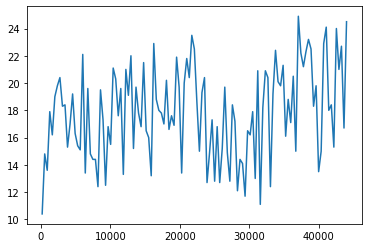

In [24]:
plt.figure()
plt.plot(df.TG[df.Day_of_year == 170])

# 2- Analyse exploratoire des données comme des Time Series

## 2.1- Seasonal Plot of temperature

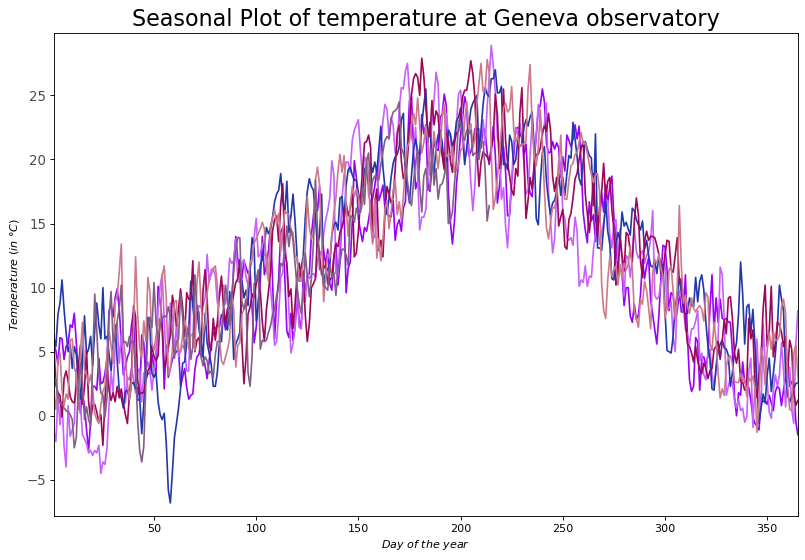

In [25]:
df1 = df[df.Year>2015]
years = df1['Year'].unique()
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)

for i, y in enumerate(years):        
    plt.plot('Day_of_year','TG',data=df1[df1.Year==y], color=mycolors[i], label=y)
        

# Decoration
plt.gca().set(xlim=(1, 365), ylim=(min(df1.TG) - 1, max(df1.TG) + 1),
              ylabel='$Temperature\ (in\ °C)$', xlabel='$Day\ of\ the\ year$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of temperature at Geneva observatory", fontsize=20)
plt.show()

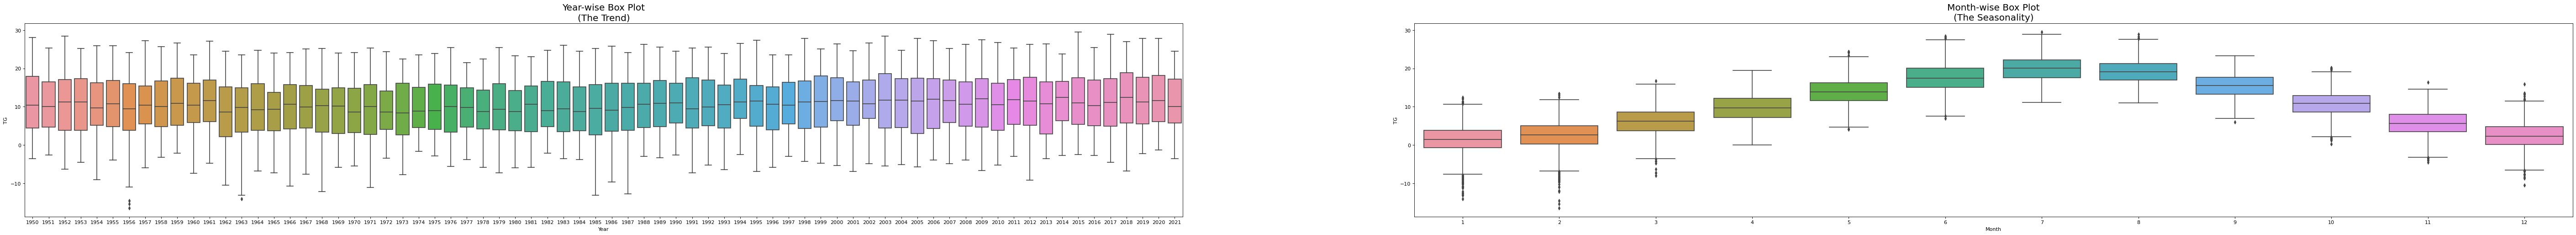

In [82]:
df1 = df[df.Year >= 1950]
# Draw Plot
fig, axes = plt.subplots(1, 2, figsize=(90,7), dpi= 80)
sns.boxplot(x='Year', y='TG', data=df1, ax=axes[0])
sns.boxplot(x='Month', y='TG', data=df1)

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

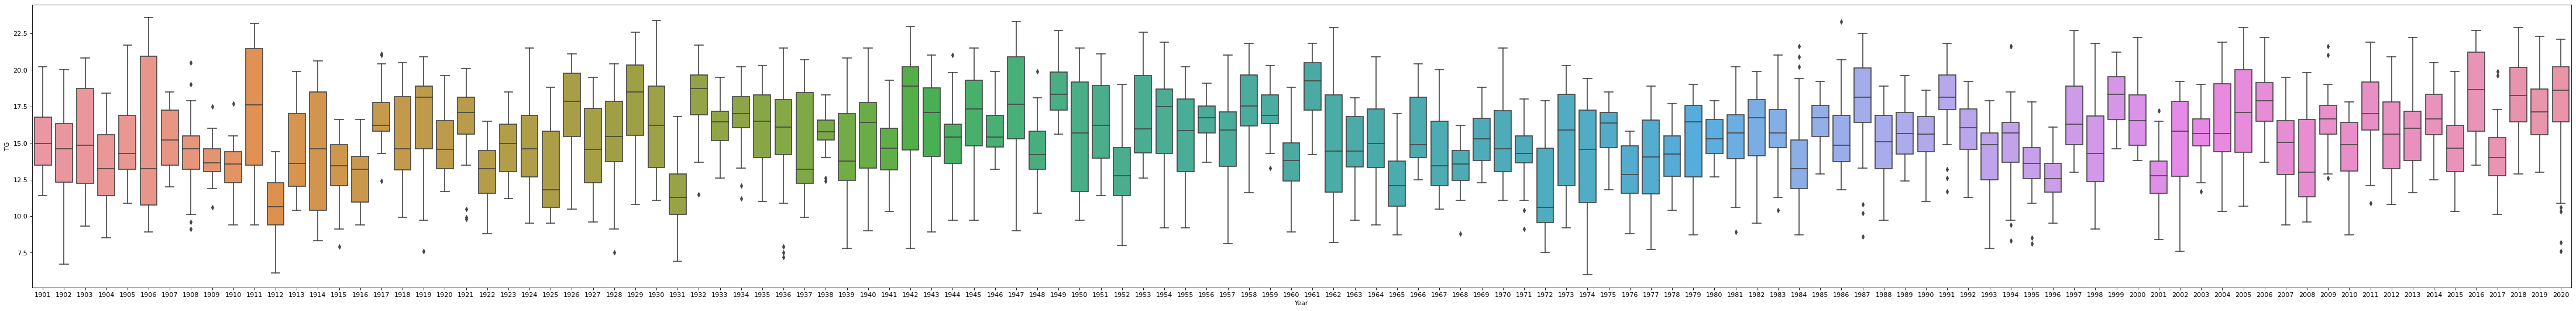

In [83]:
# Draw Plot
plt.figure(figsize=(70,8), dpi= 80)
sns.boxplot(x='Year', y='TG', data=df[df.Month == 9] )

#plt.plot(years,[st.mean(df.TG[df.Year == year]) for year in years])

# Set Title
axes[0].set_title('Year-wise Box Plot\n(The Trend)', fontsize=18); 
axes[1].set_title('Month-wise Box Plot\n(The Seasonality)', fontsize=18)
plt.show()

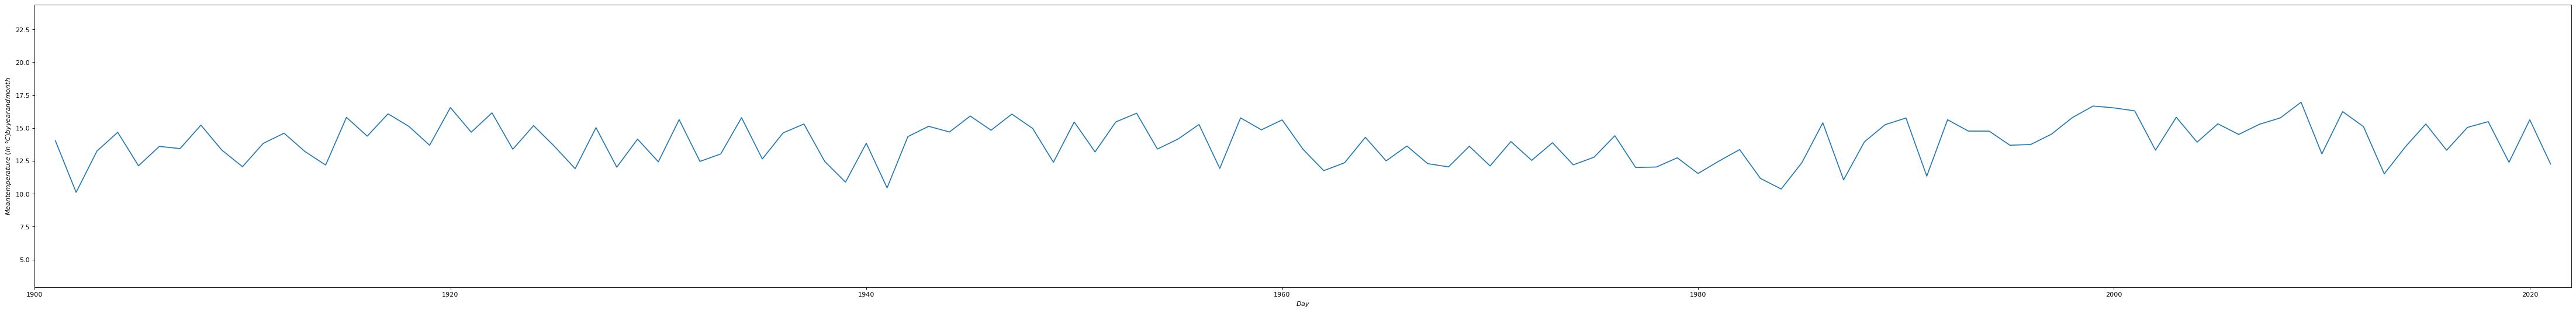

In [84]:
years = df['Year'].unique()
# Draw Plot
plt.figure(figsize=(70,8), dpi= 80)
month = 5
plt.plot(years,[st.mean(df.TG[(df.Year == year) & (df.Month == month)]) for year in years])

# Set Title
plt.gca().set(xlim=(1900, 2022), ylim=(min(df.TG[df.Month == month]), max(df.TG[df.Month == month])),
              ylabel='$Mean temperature\ (in\ °C) by year and month$', xlabel='$Day$')
plt.show()

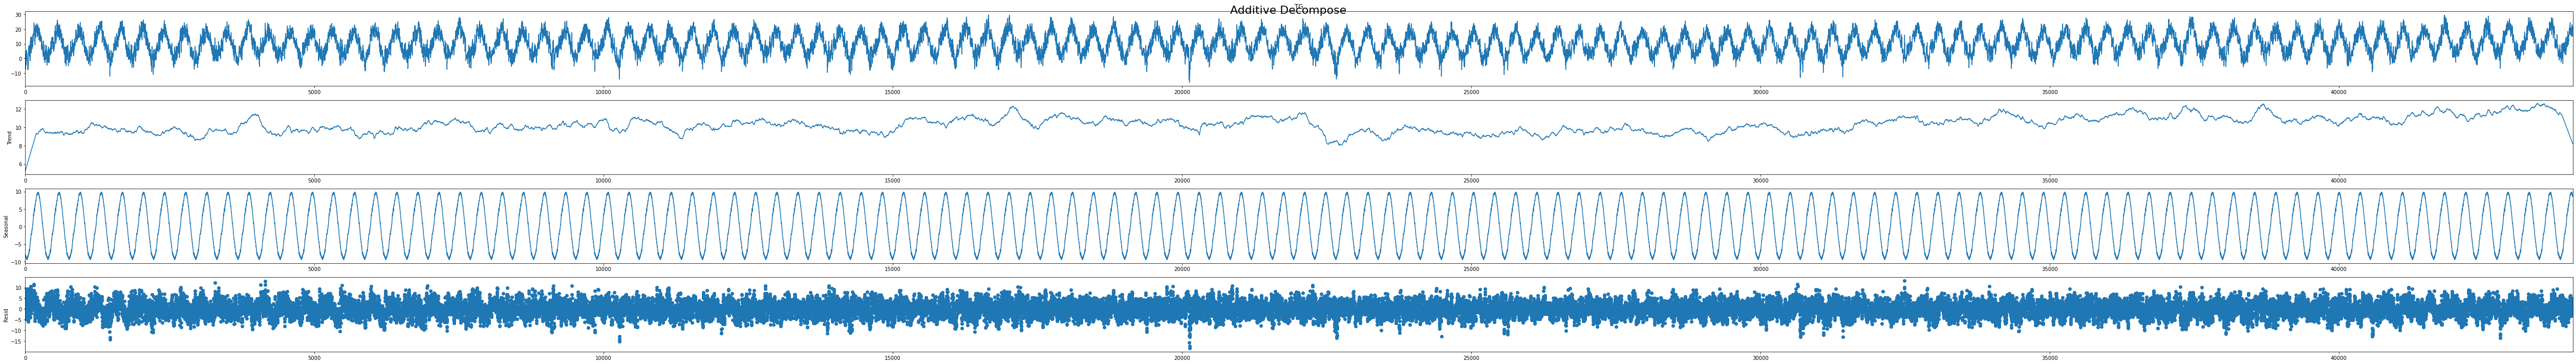

In [104]:
# Additive Decomposition
result_add = seasonal_decompose(df.TG, model='additive', extrapolate_trend=7, period = 365,two_sided=True)

plt.rcParams.update({'figure.figsize': (70,10)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show() 
#tpTG = data_temperature.TG

#data_temperature.TG = data_temperature.TG - result_add.seasonal

)
#tp.TG.hist(bins = 100, density = True)
#plt.plot(tpTG)


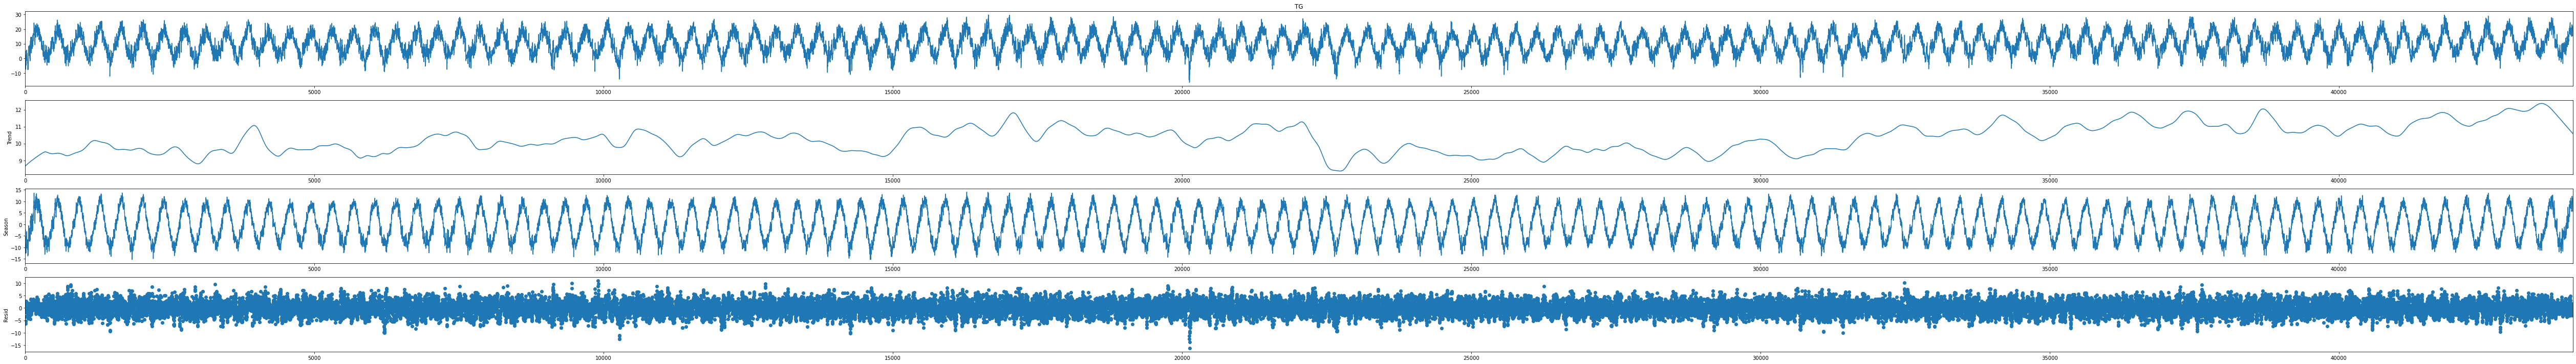

NameError: name 'tp' is not defined

In [105]:
res = STL(df.TG, period = 365).fit()
res.plot()
plt.show()


tp.TG = data_temperature.TG

tp.TG = tp.TG - res.seasonal - np.mean(tp.TG)

print(np.mean(tp.TG))
tp.TG.hist(bins = 100, density = True)

In [ ]:
# Using scipy: Subtract the line of best fit
detrended1 = sc.signal.detrend(df.TG)
trend1 = df.TG - detrended1

plt.plot(detrended1)
plt.show()
plt.figure(figsize=(20,8), dpi= 80)
plt.plot(trend1)
plt.show()

In [ ]:
# Using statmodels: Subtracting the Trend Component.

result_add = seasonal_decompose(df.TG, model='additive', extrapolate_trend='freq',period = 365)
detrended = df.TG - result_add.trend
plt.plot(detrended)
plt.figure(figsize=(20,8), dpi= 80)
plt.plot(df.TG-detrended)


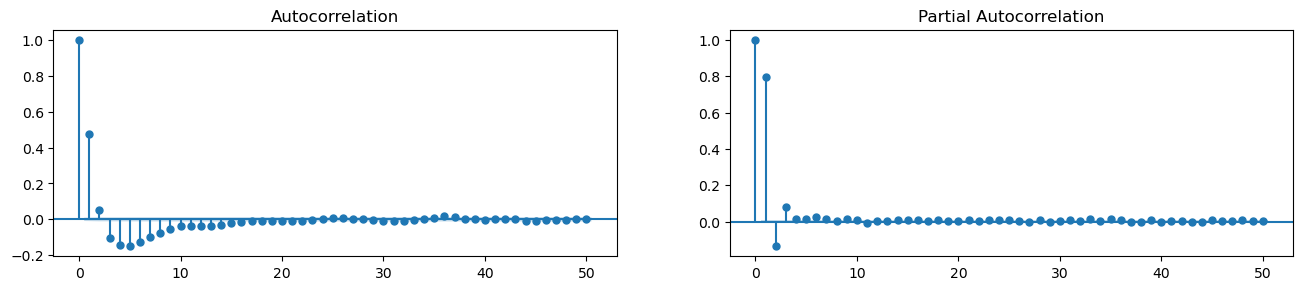

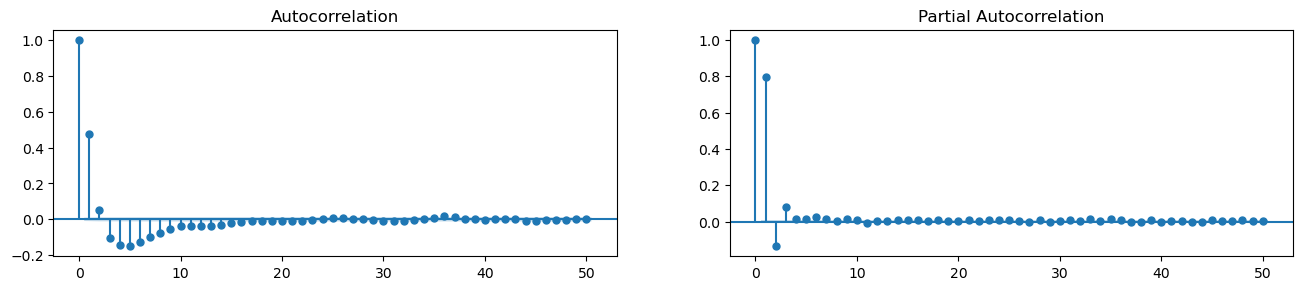

In [52]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate ACF and PACF upto 50 lags
# acf_50 = acf(df.value, nlags=50)
pacf_50 = pacf(df.TG, nlags=50)


# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(df.Detrended_Seasonless_TG, lags=50, ax=axes[0])
plot_pacf(df.Seasonless_TG, lags=50, ax=axes[1])

In [13]:
#arma_mod = ARIMA(df.TG, order=(5, 0, 0),seasonal_order=(1,0,1,365)).fit()
#print(arma_mod.params)

# Estimation of Trend and Seasonal component
Nous allons ici, chercher la façon la optimale de modéliser la saisonalité et la tendance de notre time series pour ensuite pouvoir vérifier si elle est stationnaire et enfin faire du forecasting sur une time series stationaire. 

## Method 1 :
On estimite la composante saisonière en prenant la moyenne de température de chaque jours de l'année à travers toutes les années. 

In [39]:
average_seasonal_component = [df[df.Day_of_year == j+1].TG.mean() for j in range(0,366)]
day = np.array(df.Day_of_year)
df['Season_TG'] = [average_seasonal_component[d-1] for d in day]
df["Seasonless_TG"] = df.TG-df.Season_TG

(0.0, 44044.0)

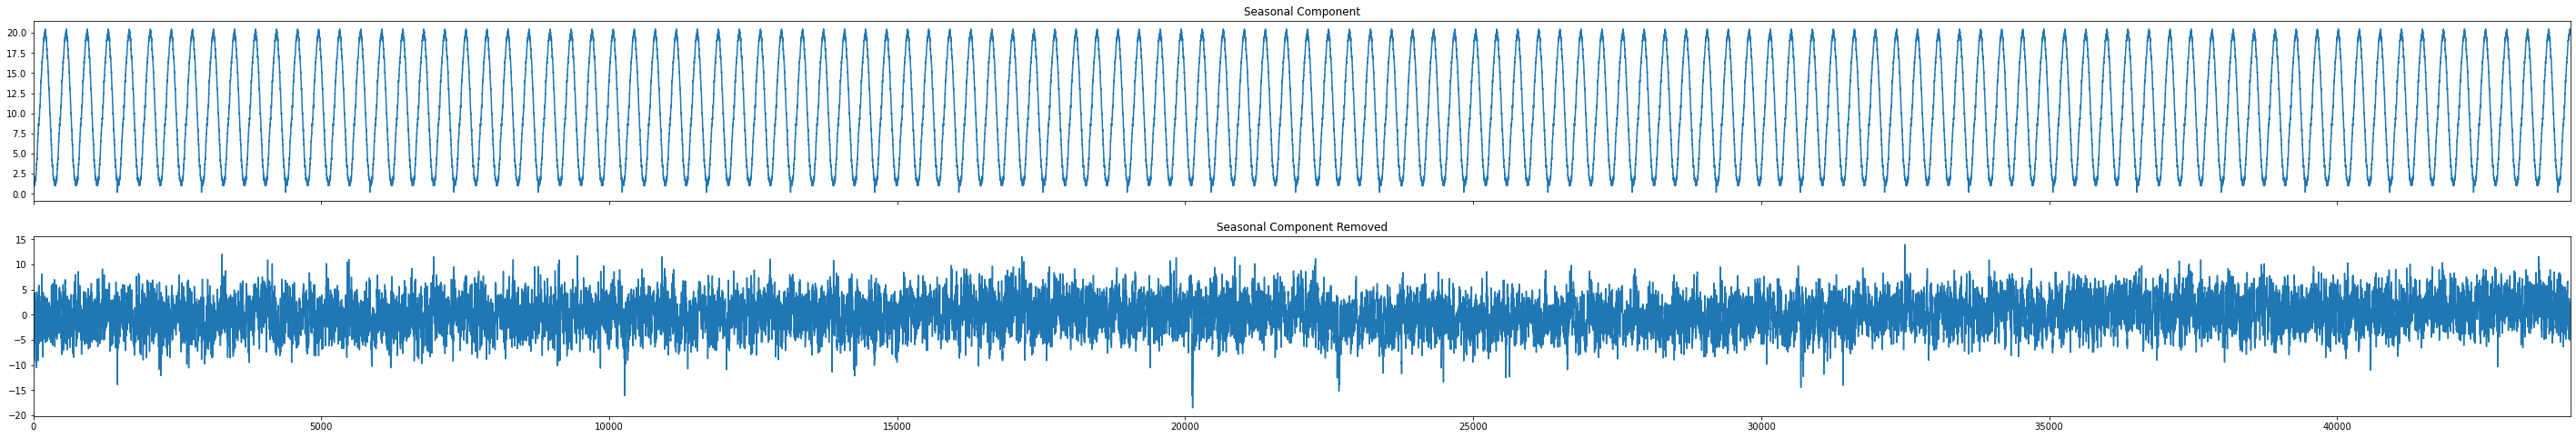

In [40]:

fig, axs = plt.subplots(2,figsize=(50,8),sharex = True)
axs[0].plot(df.Season_TG)
axs[0].set_title('Seasonal Component')
axs[1].plot(df.TG-df.Season_TG)
axs[1].set_title('Seasonal Component Removed')
plt.xlim(0,np.shape(df.Season_TG)[0])

3.192166698673393e-05


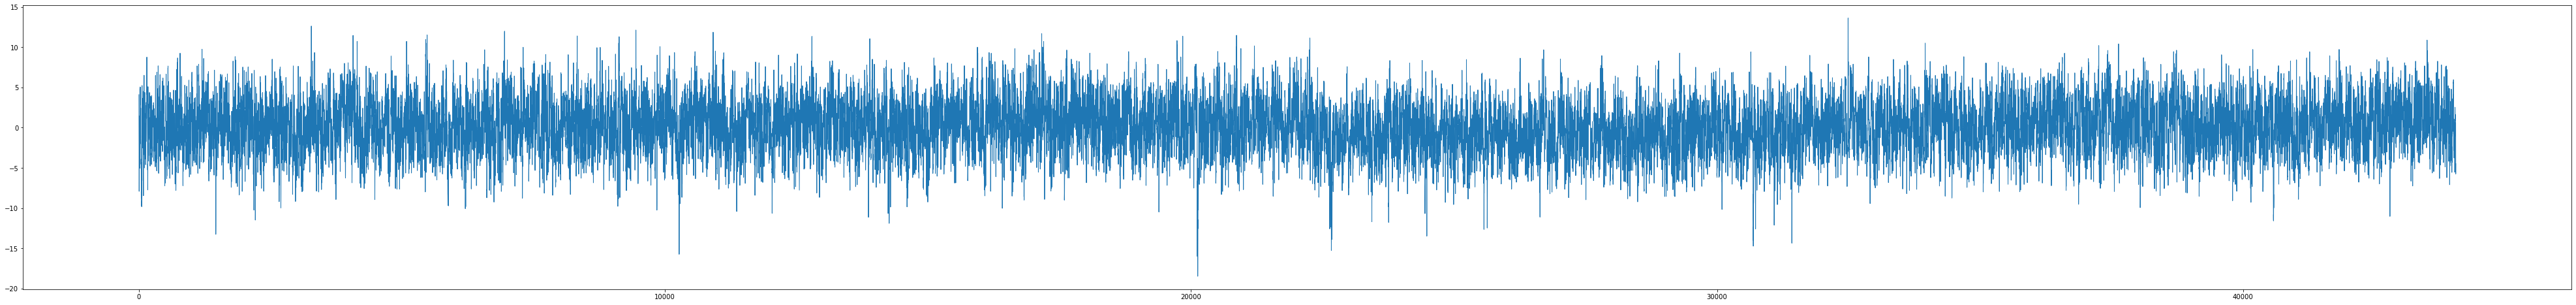

In [41]:
df["Detrended_Seasonless_TG"] = sc.signal.detrend(df.Seasonless_TG)

# trend_TG = a*t + b
i = 2
a = (df.Seasonless_TG[i+1]-df.Detrended_Seasonless_TG[i+1]) - (df.Seasonless_TG[i]-df.Detrended_Seasonless_TG[i])
b = df.Seasonless_TG[0]-df.Detrended_Seasonless_TG[0]
f_trend_lin = lambda u: a*u + b
print(a)
plt.figure(figsize=(70,8))
#plt.plot(df.Seasonless_TG-detrended, linewidth = 1)
plt.plot(df.Detrended_Seasonless_TG, linewidth = 1)

## Method 2 :
On commence par modéliser la saisonalité.

In [42]:
def convolution_avg(X,i,l = 3):
    avg = X[max(i-l,0):min(i+l+1,np.shape(X)[0])].mean()
    return avg    

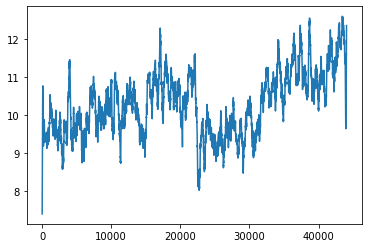

In [43]:
L = int(364/2)
average_trend = pd.DataFrame(df[["TG","Day_of_year"]])
average_trend.TG = [convolution_avg(df.TG,i,l=L) for i in range(np.shape(df.TG)[0])]
plt.plot(average_trend.TG)

In [44]:
day = np.array(df.Day_of_year)

average_trend["dev"] = df.TG-average_trend.TG
avg_dev = np.array([average_trend[average_trend.Day_of_year == j+1].dev.mean() for j in range(0,366)])
df['Season_TG'] = [(avg_dev[d-1]-avg_dev.mean()) for d in day]
df["Seasonless_TG"] = df.TG-df.Season_TG

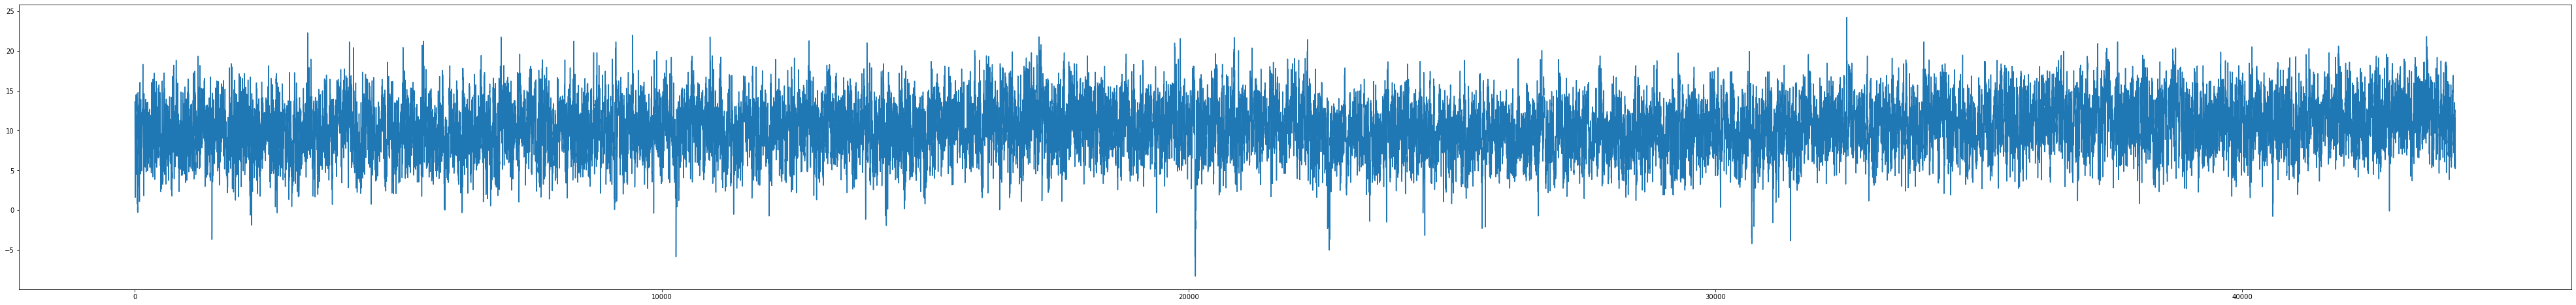

In [45]:
plt.figure(figsize = (70,8))
plt.plot(df.Seasonless_TG)

### Method 2.1 :
The trend is then estimated by smoothing with a finite moving average filter.

In [46]:
L = 20
moving_avg_filter = [convolution_avg(df.Seasonless_TG,i, L) for i in range(np.shape(df.Season_TG)[0])]
df["Detrended_Seasonless_TG"] = df.Seasonless_TG-moving_avg_filter 

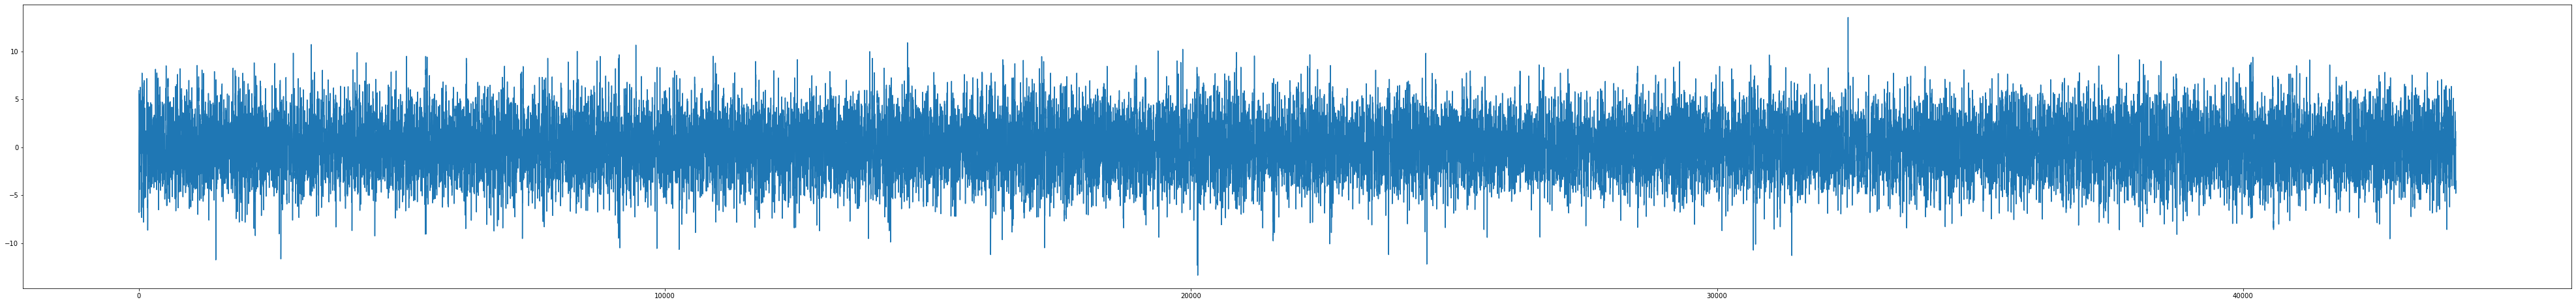

In [47]:
plt.figure(figsize = (70,8))
plt.plot(df.Detrended_Seasonless_TG)

### Method 2.2 :
The trend is then estimated by the exponential smoothing.

In [48]:
def exp_smoothing(X,alpha):
    trend = np.zeros(shape=(np.shape(X)[0]))
    trend[0] = X[0]
    for a in range(1,np.shape(X)[0]):
        trend[a] = alpha*X[a]+(1-alpha)*trend[a-1]
    return trend

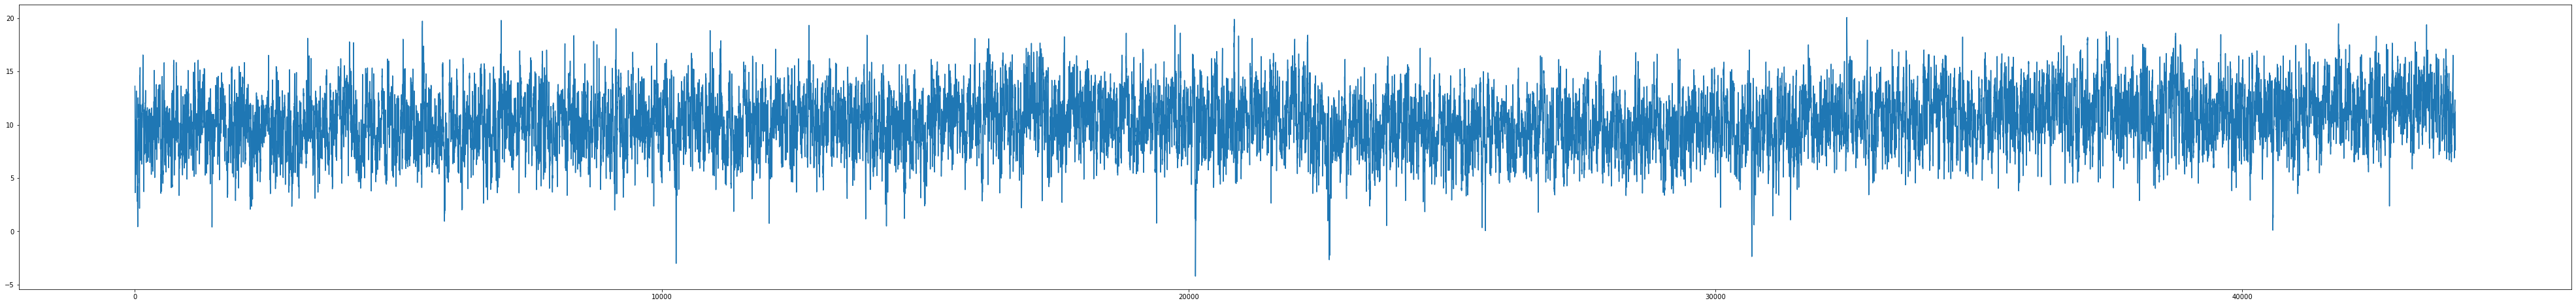

In [49]:
#Not really appropriate
alpha = 0.4
exp_avg_smoothing = exp_smoothing(df.Seasonless_TG,alpha)
df["Detrended_Seasonless_TG"] = df.Seasonless_TG-exp_avg_smoothing
plt.figure(figsize = (70,8))
plt.plot(exp_avg_smoothing)

### Method 2.3 :
The trend is estimated by a foreward weighted average.

In [50]:
def weighted_smoothing(X,w, l = 3):
    trend = np.zeros(shape=(np.shape(X)[0]))
    trend[0] = X[0]
    for pos in range(np.shape(X)[0]):
        if ((np.shape(X)[0]-pos-l-1)<0):
            trend[pos] = np.average(X[pos:np.shape(X)[0]], weights = w[:np.shape(w)[0]+(np.shape(X)[0]-pos-l-1)])
        else:
            trend[pos] = np.average(X[pos:pos+l+1], weights = w) 
    return trend

In [51]:
L = 6
#w = acf(df.Seasonless_TG, nlags = L, fft = False )
w = pacf(df.Seasonless_TG, nlags = L)
foreward_weighted_avg = weighted_smoothing(df.Seasonless_TG,w,L)

NameError: name 'pacf' is not defined

In [ ]:
plt.figure(figsize = (70,8))
plt.plot(foreward_weighted_avg)

### Method 2.4 :
Estimate the trend by polynomial fitting using linear regression.

In [17]:
t = np.linspace(0,np.shape(df.TG)[0]-1,np.shape(df.TG)[0]).reshape((np.shape(df.TG)[0],1))
one = np.ones(shape=(np.shape(t)[0],1))
X = np.concatenate([np.ones(shape=(np.shape(df.TG)[0],1)),t,np.cos(2*np.pi*t/365.),np.sin(2*np.pi*t/365.)],axis = 1)
mean = df.TG.mean()
linear_regression = LinearRegression().fit(X,df.TG-mean)


/Users/kieranvaudaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/kieranvaudaux/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


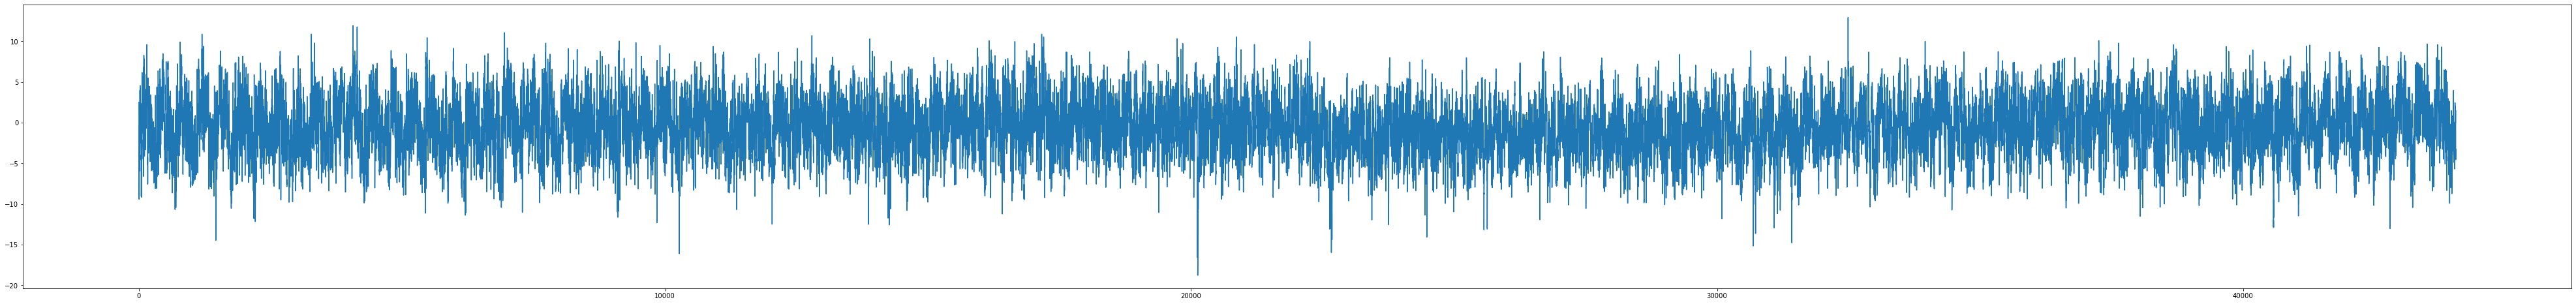

In [22]:
coef = linear_regression.coef_

fll = lambda x: coef[0]+coef[1]*x+coef[2]*np.cos(2*np.pi*x/365.)+coef[3]*np.sin(2*np.pi*x/365.)

x = np.linspace(0,np.shape(df.TG)[0]-1,100000)
plt.figure(figsize=(70,8))
s = fll(t)
plt.plot(df.TG-mean-s.reshape((np.shape(s)[0],)))


df["TG2"] =df.TG-mean-s.reshape((np.shape(s)[0],))
arma_mod = ARIMA(df.TG2[:365*5], order=(2, 0, 1)).fit()

## Tests de stationarité de la Time Serie, une fois la tendance et la saisonnalité retirée

### Tests on the aurocorrelation function

51 0.009339264908977091 44044


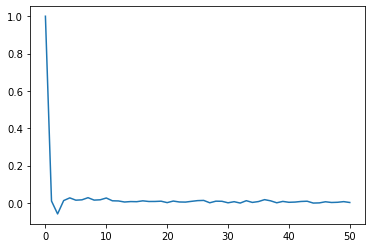

In [508]:
n = np.shape(df.Detrended_Seasonless_TG)[0]

acf_50 = acf(df.Detrended_Seasonless_TG, nlags=50,fft = False)
plt.plot(acf_50)
out_of_bound = list((acf_50>-1.96/np.sqrt(n)) | (acf_50<1.96/np.sqrt(n))).count(True)
print(out_of_bound,1.96/np.sqrt(n),n)


In [60]:

arma_mod = ARIMA(df.Seasonless_TG[:10*365], order=(2, 1, 2)).fit()




      lb_stat  lb_pvalue
5    5.234383   0.387951
6    6.368188   0.383233
7    9.988328   0.189236
8   11.433706   0.178315
9   11.604486   0.236536
10  11.732529   0.303356
11  13.230098   0.278553
12  13.622206   0.325481
13  14.073811   0.368666
14  14.157154   0.438070
15  14.577802   0.482234
16  14.722451   0.545053
17  16.644074   0.478721
18  16.719493   0.542464
19  19.024452   0.455268
20  19.042575   0.519060
21  22.714729   0.359375
22  25.564762   0.270837
23  26.756482   0.266471
24  30.862351   0.157791
25  32.487563   0.144384
26  32.509793   0.176799
27  32.837488   0.202486
28  36.461573   0.131217
29  36.488891   0.159754
30  38.599526   0.134956
31  40.490953   0.118338
32  44.608866   0.068423
33  45.510587   0.072226
34  45.765358   0.085669
35  46.841415   0.087064
36  46.843110   0.106540
37  49.331699   0.084543
38  50.770474   0.080521
39  50.771234   0.098153
40  51.447313   0.106053
41  51.760195   0.120996
42  51.760365   0.143754
43  51.847574   0.166943


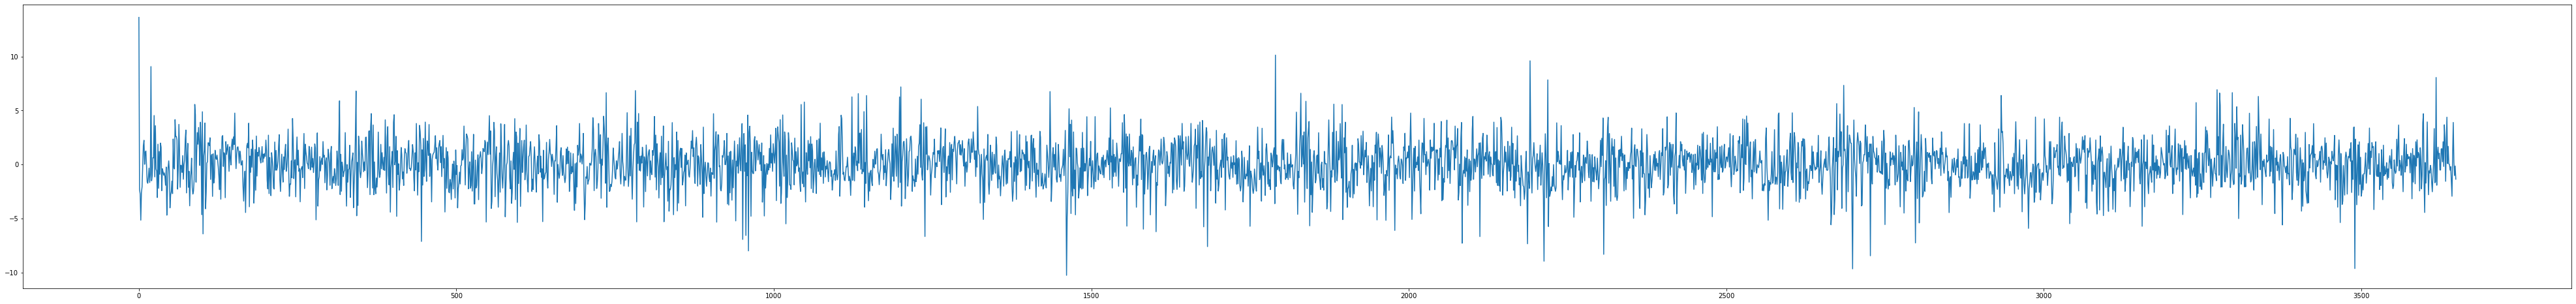

In [63]:
print(sm.stats.acorr_ljungbox(arma_mod.resid, lags=np.arange(5,50), return_df=True))
plt.figure(figsize=(70,8))
plt.plot(arma_mod.resid)
print(arma_mod.aic)

### Augmented Dickey Fuller test (ADH Test)

In ADH Test, the null hypothesis is the time series possesses a unit root and is non-stationary. So, if the P-Value in ADH test is less than the significance level, we can reject the null hypothesis. For more details on the [ADH Test](https://en.wikipedia.org/wiki/Augmented_Dickey–Fuller_test).

In [7]:
# ADF Test 
max_lag = 7 #max_lag is the maximum lag order of the autoregressive process in the ADH Test

result_adh = adfuller(df.Detrended_Seasonless_TG, autolag='AIC',maxlag = max_lag, regression = 'c')
print('\nADH Test with without seasonality and trend :')
print(f'ADF Statistic: {result_adh[0]}')
print(f'p-value: {result_adh[1]}')
print(f'Number of lag used : {result_adh[2]}')
for key, value in result_adh[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')


ADH Test with without seasonality and trend :
ADF Statistic: -53.47633464610306
p-value: 0.0
Number of lag used : 6
Critial Values:
   1%, -3.4304985042400804
Critial Values:
   5%, -2.8616056356283823
Critial Values:
   10%, -2.5668049357083196


Sur le test ci-dessus, nous avons tester l'hypothèse nulle ($H_{0}$ : la time serie n'est pas stationnaire et possède sur racine unitaire). Nous obtenons que nous pouvons rejetter l'hypothèse nulle sous n'importe niveau de significativité.



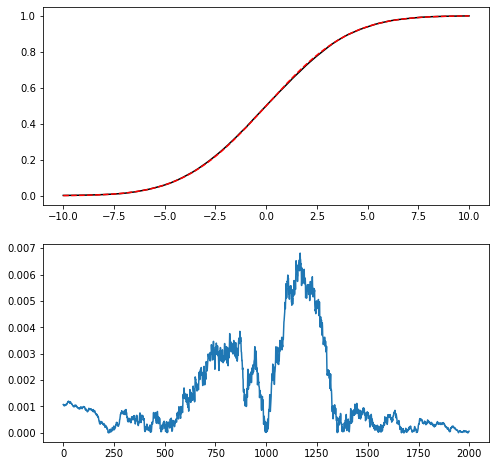

In [8]:
ecdf = ECDF(df.Seasonless_TG)
x = np.linspace(-10.,10.,2000)
plt.figure(figsize = (8,8))
plt.plot(x,ecdf(x))
std = df.Detrended_Seasonless_TG.std()

plt.subplot(211)
plt.plot(x,ecdf(x),"k")
plt.plot(x,sc.stats.norm.cdf(x,scale = std), "r--")
plt.subplot(212)
plt.plot(np.abs(ecdf(x)-sc.stats.norm.cdf(x,loc = df.Seasonless_TG.mean() ,scale = std)))

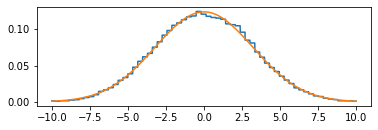

In [9]:
hist = np.histogram(df.Detrended_Seasonless_TG, bins=100)
hist_dist = sc.stats.rv_histogram(hist)
plt.subplot(211)
plt.plot(x,hist_dist.pdf(x))
plt.plot(x,sc.stats.norm.pdf(x,loc=0, scale=std))


In [10]:
def create_monthly_avg_time_serie(data, mean = True):
    new_data = pd.DataFrame()
    years = data.Year.unique()
    months = data.Month.unique()
    for i in range(np.shape(years)[0]):
        for m in range(np.shape(months)[0]):
            avg = data.TG[(data.Year == years[i]) & (data.Month == months[m])].mean()
            new_data = new_data.append([[avg,years[i],months[m]]])
            
    new_data.columns = ["avg_TG","Year","Month"]
    
    return new_data.dropna(axis = 0).copy()

In [11]:
df_monthly_avg = create_monthly_avg_time_serie(df)

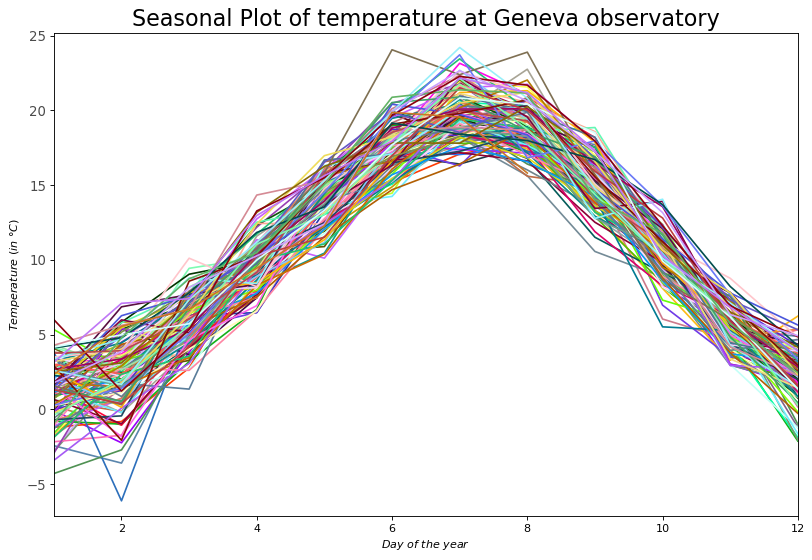

In [135]:
df1 = df_monthly_avg#[(df_monthly_avg.Year==2000) | (df_monthly_avg.Year==1902) | (df_monthly_avg.Year==1950)]
years = df1['Year'].unique()
# Prep Colors
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Draw Plot
plt.figure(figsize=(12,8), dpi= 80)

for i, y in enumerate(years):        
    plt.plot('Month','avg_TG',data=df1[df1.Year==y], color=mycolors[i], label=y)
        

# Decoration
plt.gca().set(xlim=(1, 12), ylim=(min(df1.avg_TG) - 1, max(df1.avg_TG) + 1),
              ylabel='$Temperature\ (in\ °C)$', xlabel='$Day\ of\ the\ year$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Seasonal Plot of temperature at Geneva observatory", fontsize=20)
plt.show()

# Tests sur les Time Series pour tester l'hypothèse de normalité
Dans cette partie, nous allons tester une hypothèse de normalité $X\sim \mathcal{N}(\mu,\,\sigma^{2})$ sur la time serie des températures moyennes désaisonnalisé $X$.
Plus précisément, nous allons d'abord tester les hypothèses :
- $H_0: \mu > 0$
- $H_0: \mu < 0$

Cela nous permettra de savoir si 

In [116]:
T, p = sc.stats.ttest_1samp(df.Detrended_Seasonless_TG,0,alternative = "less")
print(p)

0.5000000000000042


In [119]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), sc.stats.sem(a)
    h = se * sc.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [120]:
m1,m2,m3 = mean_confidence_interval(df.Detrended_Seasonless_TG)
print(m1,m2,m3)

1.6519747557404926e-16 -0.03006538095974896 0.030065380959749293
